### RandomForest

In [7]:
dataset =  pd.read_csv('data/analytics/datasetEstudio-2020-2024MuestraEscalados.csv')
dataset.head()

,edad,anio,dia,mes,sector_ips,NombreIPS,estacion,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,0.816667,1.00,0.200000,0.454545,1.0,0.833333,1.0,0.021028,0.103545,1.0,0.0,0.762202,0.508594,0.790541,0.015789,0.376543,0.413793,0.007042,0.004032,0.0
1,0.358333,0.75,0.333333,0.363636,1.0,0.256410,1.0,0.011682,0.166548,1.0,0.0,0.637591,0.494922,0.702704,0.010526,0.135802,0.172414,0.510563,0.584677,0.0
2,0.700000,0.75,1.000000,0.545455,0.5,0.846154,0.5,0.007009,0.047407,0.5,0.0,0.720146,0.375000,0.318244,0.005263,0.432099,0.448276,0.292254,0.612903,0.5
3,0.541667,0.50,0.033333,0.636364,0.5,0.935897,0.5,0.032710,0.204610,0.5,0.0,0.084112,0.941406,0.298647,0.084211,0.259259,0.137931,0.598592,0.673387,0.5
4,0.016667,0.25,0.666667,1.000000,1.0,0.525641,1.0,0.009346,0.332200,0.5,0.0,0.478712,0.604492,0.656082,0.005263,0.135802,0.206897,0.478873,0.564516,0.0


In [8]:
X = dataset.drop('atenciones_por_dia', axis=1)
y = dataset['atenciones_por_dia']
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Mean Squared Error (MSE): 5.958866116506749e-05
Root Mean Squared Error (RMSE): 0.007719369220672599
R-squared (R2): 0.9967138815945222


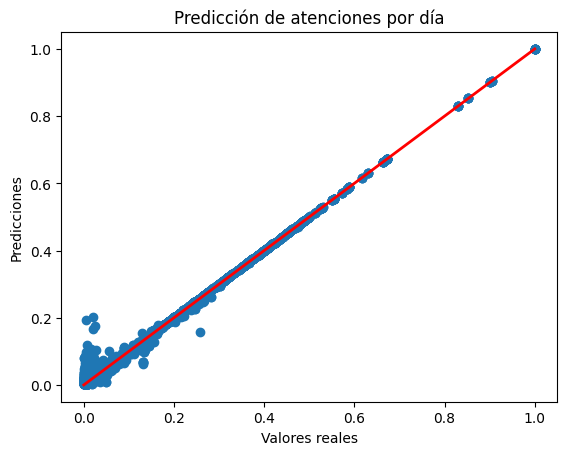

In [9]:
#Hacer modelo de randomforest

from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir con los datos de prueba

y_pred = rf_model.predict(X_test)

# Evaluar el modelo
#Metricas del modelo SVM
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#Metricas mae
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
# Graficar la predicción vs el valor real
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Línea de referencia')  # Línea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicción de atenciones por día')
plt.show()

In [10]:

# Predicciones en el conjunto de entrenamiento
y_train_pred = rf_model.predict(X_train)

# Calcular el error cuadrático medio en entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Imprimir las métricas para el conjunto de entrenamiento
print(f'Mean Squared Error (MSE) en entrenamiento: {mse_train}')
print(f'Root Mean Squared Error (RMSE) en entrenamiento: {rmse_train}')
print(f'R-squared (R2) en entrenamiento: {r2_train}')





Mean Squared Error (MSE) en entrenamiento: 9.026721997795368e-06
Root Mean Squared Error (RMSE) en entrenamiento: 0.0030044503653406172
R-squared (R2) en entrenamiento: 0.9994880359781471
